How does one exactly detect credit card fraud? Let's examine a couple of ways in which we can. Two methods I can think of immediately are:

* Change point detection (i.e. looking at statistically significant changes in credit card expenditures)
* Supervised learning, creating a classifier (logistic regression, decision trees, etc) to predict whether or not a transaction will be fraudulent. 

In [1]:
# import the required libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Load Data Set

Let's load in and get to know the data a bit. 

In [2]:
# load in data
credit = pd.read_csv('creditcard.csv')

# useful printouts
print (credit.head(10))
print ("============================")
print (credit.dtypes)

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
5   2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   
6   4.0  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708 -0.005159   
7   7.0 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
8   7.0 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818  0.370145   
9   9.0 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761  0.651583   

         V8        V9  ...         V21       V22       V23       V24  \
0  0.098698  0.363787  ...   -0.0183

## Exploratory Data Analysis

### Descriptive Statistics

In [3]:
credit.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


The thing most people would be most immediately interested in are the amounts. Let's look at cumulative transaction amounts across time. 

In [4]:
# split data set into fraudulent and non-fraudulent sets 
fraud = credit[credit['Class'] == 1]
good = credit[credit['Class'] == 0]

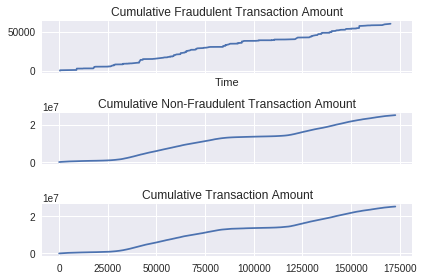

In [5]:
plt.figure()

fig, ([ax1, ax2, ax3]) = plt.subplots(3, 1, sharex=True)

ax1.plot(fraud['Time'], np.cumsum(fraud['Amount']))
ax1.set_title('Cumulative Fraudulent Transaction Amount')
ax1.set_xlabel('Time')

ax2.plot(good['Time'], np.cumsum(good['Amount']))
ax2.set_title('Cumulative Non-Fraudulent Transaction Amount')

ax3.plot(credit['Time'], np.cumsum(credit['Amount']))
ax3.set_title('Cumulative Transaction Amount')

plt.tight_layout()

They have the same basic trend, but the jumps in the graph of the fraudulent transactions are more profound (only due to the fact there are only 490 such observations). The non-fraudulent transactions as well as transactions for the entire set look about the same. 

In [6]:
# grab ratio of fraudulent transactions to good transactions
percentage = len(fraud)/float(len(good))
# undersample by this percentage, set seed to 1 for reproducibility
np.random.seed(1)
# subsample of good transactions will be some percentage of all the good transactions
good_trans = good.take(np.random.permutation(len(good))[:round(percentage*len(good))])
# fraudulent transactions are fraudulent
fraud_trans = fraud
# combine into a new frame, resetting the index
cred_data = pd.concat([good_trans, fraud_trans], ignore_index= True)

/home/shahir/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [7]:
target = 'Class'
features = cred_data.columns[1:30]

In [8]:
from sklearn.model_selection import train_test_split

train_and_val, test = train_test_split(cred_data, test_size = 0.1)
train, val = train_test_split(train_and_val, test_size = 0.1)

# Train a logistic regression model

In [9]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()
logit.fit(train[features], train[target]);

In [10]:
# import tools for evaluating performance of classifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

In [11]:
prediction = logit.predict(test[features])
actual = test[target]
# accuracy 
acc = accuracy_score(actual, prediction)
# precision
prec = precision_score(actual, prediction)
# recall
rec = recall_score(actual, prediction)
# F1 score
f1 = f1_score(actual, prediction)

print ("The accuracy is: %0.2f." %acc)
print ("The precision is: %0.2f." %prec)
print ("The recall is: %0.2f." %rec)
print ("The F1 score is: %0.2f." %f1)

The accuracy is: 0.94.
The precision is: 0.95.
The recall is: 0.90.
The F1 score is: 0.92.


In [12]:
def plot_f1_scores(train_data, validation_data, features, target, reg_params):
    f1_scores = []
    for c in reg_params:
        logit = LogisticRegression(C = c, penalty = 'l2')
        logit.fit(train_data[features], train_data[target])
        predicts = logit.predict(validation_data[features])
        f1 = f1_score(validation_data[target], predicts)
        f1_scores.append(f1)
        
    plt.plot(reg_params, f1_scores)
    plt.xlabel('Regularization Parameter')
    plt.ylabel('F1 Score')
    plt.tight_layout()

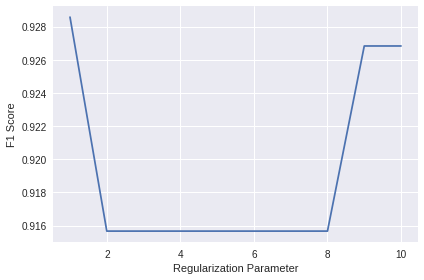

In [13]:
plot_f1_scores(train, val, features, target, np.arange(1,11))